<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
boston = pd.concat([y, X], axis=1)
boston

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.shape

(506, 14)

In [6]:
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [7]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# Number of unique values for each column
boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

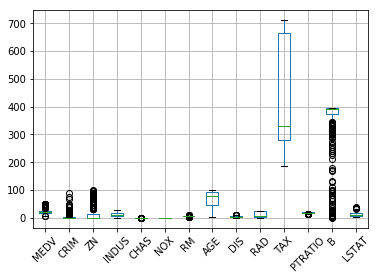

In [10]:
# Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
boston.boxplot(rot=45);

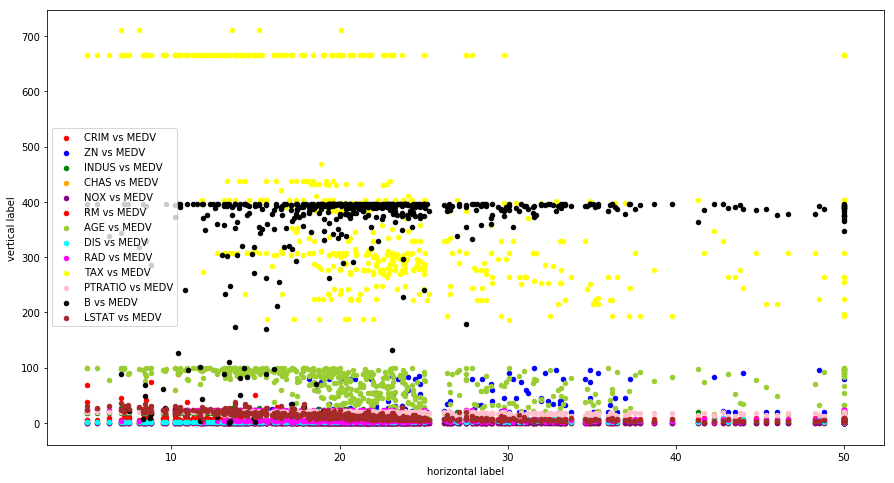

In [22]:
# Scatterplot of each column with median price
fig, ax = plt.subplots(figsize=(15,8)) # width, height
boston.plot(kind='scatter', x='MEDV', y='CRIM', label='CRIM vs MEDV', color='r', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='ZN', label='ZN vs MEDV', color='b', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='INDUS', label='INDUS vs MEDV', color='g', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='CHAS', label='CHAS vs MEDV', color='orange', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='NOX', label='NOX vs MEDV', color='purple', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='RM', label='RM vs MEDV', color='r', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='AGE', label='AGE vs MEDV', color='yellowgreen', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='DIS', label='DIS vs MEDV', color='cyan', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='RAD', label='RAD vs MEDV', color='magenta', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='TAX', label='TAX vs MEDV', color='yellow', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='PTRATIO', label='PTRATIO vs MEDV', color='pink', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='B', label='B vs MEDV', color='black', ax=ax);
boston.plot(kind='scatter', x='MEDV', y='LSTAT', label='LSTAT vs MEDV', color='brown', ax=ax);

ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()


- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [29]:
from sklearn import metrics

null_pred = y - np.mean(y)



In [118]:

null_pred = y - np.mean(y)
null_mse = metrics.mean_squared_error(null_pred, y)
print(null_mse)

507.72736083988303


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [31]:
# 1. Import the LinearRegression model class.
from sklearn.linear_model import LinearRegression

In [45]:
# 2. Make an instance of the LinearRegression class.
lr_medv = LinearRegression()
type(lr_medv)

sklearn.linear_model.base.LinearRegression

In [46]:
X = boston.loc[:, ['CRIM']] 
y = boston.loc[:, 'MEDV']


In [49]:
from sklearn.model_selection import train_test_split

# train on 70% of data, thus test_size is kept = .30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

lr_medv.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
pred_medv = lr_medv.predict(X_test)
print(pred_medv)

[ 4.20203016 24.0980062  24.1064081  19.4273542  24.10807524 22.76705043
 24.10871794 17.07606771 23.95062816 24.11681602 24.10692616 24.10849981
 23.49212262 23.62430945 24.05062522 24.07458837 24.0114475  23.91229569
 24.02482745 20.98246979 23.74010926 20.90010231 24.09783091 24.09647149
 21.91178574 22.68938444 21.10071187 24.08011563 24.10684436 24.03123891
 24.07581535 24.08293574  9.45035683 24.08239042 24.0832941  23.79889142
 24.10914641 20.23819826 23.67172937 23.97149464 24.08502356 24.05411141
 19.4651764  23.40605862 24.02145812 24.11607594 23.87596535 24.01541669
 23.82810527 16.4822475  24.09836066 24.0967909  23.87504219 21.00713017
 23.21903934 21.67102856 23.21238247 16.29691484 24.11523847 20.94509554
 23.65567344 24.10271157 22.743395   22.88806589 24.10258303 24.10246618
 24.10609259 21.61027154 24.08464962 24.09342546 24.06925198 24.07570629
 23.85862401 24.04605228 22.24593377 19.02735816 18.16539376 24.03474068
 23.92832047 16.91496306 23.95971562 15.53104453 24

In [56]:
print (metrics.mean_squared_error(y_test, pred_medv))

69.44923590760776


In [57]:
lr_medv.score(X_test, y_test)

0.14077847848918212

- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [79]:
from sklearn import model_selection

kf = model_selection.KFold(n_splits=10, shuffle=True)

In [87]:
print (y.count())
print (X.count())



506
CRIM    506
dtype: int64


In [95]:
list(kf.split(X, y))

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  32,  33,  34,  35,  36,  37,  38,  39,  40,
          41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
          54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
          67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  81,
          82,  83,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
          97,  98,  99, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
         125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 161, 163, 165, 166, 167, 168, 170,
         171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184,
         185, 186, 187, 188, 189, 190,

In [100]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.loc[train_index, :]
    y_train = y.loc[train_index]
    lr.fit(X_train, y_train)
    
    X_test = X.loc[test_index, :]
    y_test = y.loc[test_index]
    r2 = lr.score(X_test, y_test)
    scores.append(r2)
    
    mse = metrics.mean_squared_error(y_test, lr.predict(X_test))
    mse_values.append(mse)
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 43.58511446936297
R2: 0.18331743597780492

Model 2
MSE: 50.45826135892985
R2: 0.11600958314865595

Model 3
MSE: 70.27752289832405
R2: -0.053033170865608215

Model 4
MSE: 83.92891428888834
R2: 0.21059066189875963

Model 5
MSE: 57.96399243878799
R2: 0.19615714721167676

Model 6
MSE: 95.95679974847562
R2: 0.14452581224721373

Model 7
MSE: 96.93110267907151
R2: 0.12258166253041146

Model 8
MSE: 68.2717673303435
R2: 0.1263342562656541

Model 9
MSE: 105.97783035553401
R2: 0.07102560210892905

Model 10
MSE: 56.370428355550736
R2: 0.09176660613191734

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 72.97217339232687
Mean of R2 for all folds: 0.12092755966554147


In [117]:
null_pred = y - np.mean(y)
null_mse = metrics.mean_squared_error(null_pred, y)
print(null_mse)

507.72736083988303


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

-- MEan of MSE of all folds is was less then the null model MSE. We did better by using a feature, one in this case vs just using Mean
-- We know more the features more the bias. In other words when we are adding 1 feature and / or more features we are increasing the bias of our model
-- variance will not change as we not collecting more data.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

-- Variance = Test MSE - Train MSE = 2.164. Which is pretty Low and R2 (bias) is 0.73 which seems okay.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

-- as of know I think it has more variance problem. We have just added one feature, there are lot to experiment before we end up into many feature model

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

In [110]:
# If we add more features in this case Model in theory should get better. But we know we have to try it out with
# different set of columns and see which feature set makes it optimum

In [111]:
feature_columns = ['CRIM', 'DIS']
X = boston.loc[:, feature_columns] 
y = boston.loc[:, 'MEDV']



In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123) 

kf.split(X, y)

<generator object _BaseKFold.split at 0x1a1cee1ca8>

In [113]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression()
    X_train = X.loc[train_index, :]
    y_train = y.loc[train_index]
    lr.fit(X_train, y_train)
    
    X_test = X.loc[test_index, :]
    y_test = y.loc[test_index]
    r2 = lr.score(X_test, y_test)
    scores.append(r2)
    
    mse = metrics.mean_squared_error(y_test, lr.predict(X_test))
    mse_values.append(mse)
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 91.76205088322934
R2: 0.15456471274849914

Model 2
MSE: 86.84440974040491
R2: 0.09112270894973784

Model 3
MSE: 32.73401598704829
R2: 0.19746397232021717

Model 4
MSE: 80.32030991601249
R2: 0.14037609210824942

Model 5
MSE: 67.701128448914
R2: -0.003415870219946715

Model 6
MSE: 83.46738072918505
R2: 0.05797471522277875

Model 7
MSE: 63.76771187584694
R2: 0.2289415141146982

Model 8
MSE: 41.45491146717232
R2: 0.27619354782705485

Model 9
MSE: 117.6274574730832
R2: 0.05407633899153785

Model 10
MSE: 53.77809911380884
R2: 0.16535232512366438

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 71.94574756347052
Mean of R2 for all folds: 0.1362650057186491


In [114]:
# -- note we added one more variable "DIS" as a feature to a model and our Mean of MSE reduced furher to 71.9 from 72.9. Not much 
# but seems step in right direction

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [119]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [120]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [121]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [122]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [123]:
print(iris.shape)
print("--")
print(iris.dtypes)
print("--")
print(iris.isnull().sum())
print("--")
print(iris.describe())
print("--")
print(iris.groupby('species').describe())

(150, 6)
--
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object
--
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64
--
       sepal_length  sepal_width  petal_length  petal_width  species_num
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667     1.000000
std        0.828066     0.433594      1.764420     0.763161     0.819232
min        4.300000     2.000000      1.000000     0.100000     0.000000
25%        5.100000     2.800000      1.600000     0.300000     0.000000
50%        5.800000     3.000000      4.350000     1.300000     1.000000
75%        6.400000     3.300000      5.100000     1.800000     2.000000
max        7.900000     4.400000      6.900000     2.500000     2.000000
--
                petal_length               

- Get the accuracy of a null model that simply predicts the most common species.

In [125]:
for column in iris.columns:
    print ("Column: {} \n Value Counts: \n {} \n".format(column, iris[col].value_counts()))

Column: sepal_length 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 

Column: sepal_width 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 

Column: petal_length 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 

Column: petal_width 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 

Column: species 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 

Column: species_num 
 Value Counts: 
 2    50
1    50
0    50
Name: species_num, dtype: int64 



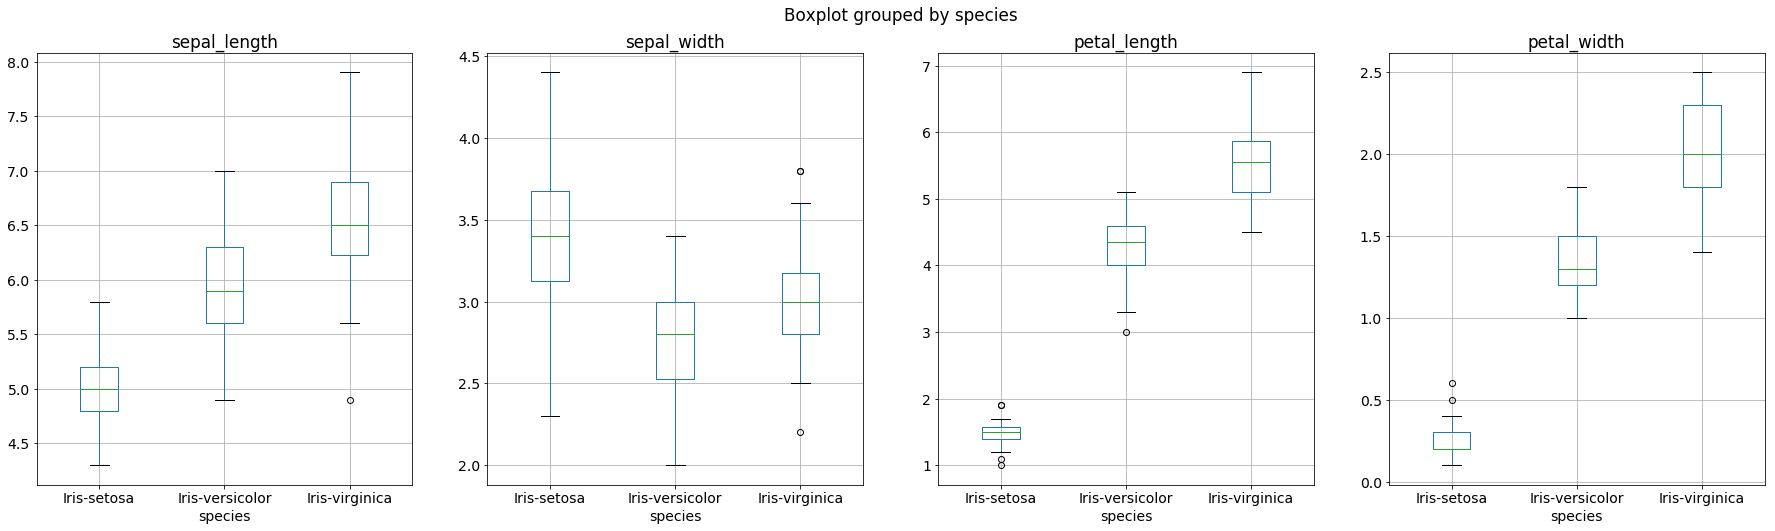

In [127]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(30,8))
iris.boxplot('sepal_length', by='species', ax =ax1);
iris.boxplot('sepal_width', by='species', ax =ax2);
iris.boxplot('petal_length', by='species', ax =ax3);
iris.boxplot('petal_width', by='species', ax =ax4);

In [129]:
most_common_species = iris['species'].value_counts().index[0]
print ("Common species: {}".format(most_common_species))
#accuracy
print("Accuracy of NULL model: {}".format(iris['species'].value_counts()[most_common_species] / len(iris['species'])))


Common species: Iris-versicolor
Accuracy of NULL model: 0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [139]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris.loc[:, feature_columns]
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, shuffle=True)
knn_iris = KNeighborsClassifier(n_neighbors=5)
knn_iris.fit(X_train, y_train)
y_pred = knn_iris.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred)))


0.9736842105263158


In [138]:
# Cross validation
kf = model_selection.KFold(n_splits=10, shuffle=True)

train_accuracy = []
test_accuracy = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    X_train = X.loc[train_index, :]
    y_train = y[train_index]
    knc_model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
    y_train_pred = knc_model.predict(X.loc[train_index, :])
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    
    y_pred = knc_model.predict(X.loc[test_index, :])
    test_accuracy.append(metrics.accuracy_score(y[test_index], y_pred))
    
    n += 1
    
    print('Model {}'.format(n))
    print('Accuracy Test {}'.format(test_accuracy[n-1]))

print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Accuracy for all folds: Train: {} Test: {}'.format(np.mean(train_accuracy), np.mean(test_accuracy)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Accuracy Test 1.0
Model 2
Accuracy Test 0.9333333333333333
Model 3
Accuracy Test 0.9333333333333333
Model 4
Accuracy Test 1.0
Model 5
Accuracy Test 0.9333333333333333
Model 6
Accuracy Test 1.0
Model 7
Accuracy Test 1.0
Model 8
Accuracy Test 1.0
Model 9
Accuracy Test 0.9333333333333333
Model 10
Accuracy Test 1.0
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Accuracy for all folds: Train: 0.9777777777777776 Test: 0.9733333333333334


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

#Accuracy of NULL model: 0.33
#Accuracy of simple train test model: 0.97
#Accuracy of 10 fold cross validation with k = 10: 0.97 (Test)
#Overall better model compared to NULL model -> low variance and high accuracy.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

-- Accuracy is slightly higher on Train set vs Test. However its minuscle, difference in 0.00x , basically reflect variance and bias both are low

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

-- Variance appears to be low, but as accuracy is close to 100% but not as its the case for " perfect model". Thus this appears to be scenario of some bias problem

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [141]:
print("-- CROSS VALIDATION each fold --")
train_accuracy = {}
test_accuracy = {}
kf = model_selection.KFold(n_splits=10, shuffle=True)
for k in range(1, 100):
    train_accuracy[k] = []
    test_accuracy[k] = []
    n = 0
    for train_index, test_index in kf.split(X, y):
        X_train = X.loc[train_index, :]
        y_train = y[train_index]
        knc_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        y_train_pred = knc_model.predict(X.loc[train_index, :])
        train_accuracy[k].append(metrics.accuracy_score(y_train, y_train_pred))

        y_pred = knc_model.predict(X.loc[test_index, :])
        test_accuracy[k].append(metrics.accuracy_score(y[test_index], y_pred))

        n += 1

-- CROSS VALIDATION each fold --


In [142]:
print("-- SUMMARY--")
scores = []
for k, v in test_accuracy.items():
    acc = np.mean(v)
    print('Mean of Accuracy for k: {} :: Test: {}'.format(k, acc))
    scores.append([k, acc])

-- SUMMARY--
Mean of Accuracy for k: 1 :: Test: 0.96
Mean of Accuracy for k: 2 :: Test: 0.9466666666666667
Mean of Accuracy for k: 3 :: Test: 0.9533333333333334
Mean of Accuracy for k: 4 :: Test: 0.96
Mean of Accuracy for k: 5 :: Test: 0.9733333333333334
Mean of Accuracy for k: 6 :: Test: 0.9666666666666666
Mean of Accuracy for k: 7 :: Test: 0.9733333333333334
Mean of Accuracy for k: 8 :: Test: 0.9666666666666668
Mean of Accuracy for k: 9 :: Test: 0.9666666666666666
Mean of Accuracy for k: 10 :: Test: 0.9666666666666668
Mean of Accuracy for k: 11 :: Test: 0.9800000000000001
Mean of Accuracy for k: 12 :: Test: 0.9733333333333334
Mean of Accuracy for k: 13 :: Test: 0.9666666666666666
Mean of Accuracy for k: 14 :: Test: 0.9533333333333334
Mean of Accuracy for k: 15 :: Test: 0.9733333333333334
Mean of Accuracy for k: 16 :: Test: 0.9733333333333334
Mean of Accuracy for k: 17 :: Test: 0.9733333333333334
Mean of Accuracy for k: 18 :: Test: 0.9733333333333334
Mean of Accuracy for k: 19 :: Test

In [144]:
# K = 11 gives best Test accuracy = 0.9800000000000001

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

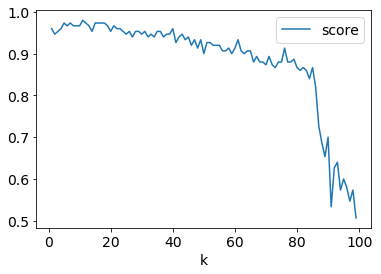

In [145]:
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [116]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

AttributeError: 'DataFrame' object has no attribute 'data'

In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
